In [2]:
# loading the datasets and needed libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

vle = pd.read_csv('vle.csv')

assessments = pd.read_csv('assessments.csv')
#print(assessments.head(3))

courses = pd.read_csv('courses.csv')
#print(courses.head(3))

studentAssessment = pd.read_csv('studentAssessment.csv')
#print(studentAssessment.head(3))

studentInfo = pd.read_csv('studentInfo.csv')
#print(studentInfo.head(3))

studentRegistration = pd.read_csv('studentRegistration.csv')
#print(studentRegistration.head(3))

studentVle = pd.read_csv('studentVle.csv')
#print(studentVle.head(3))


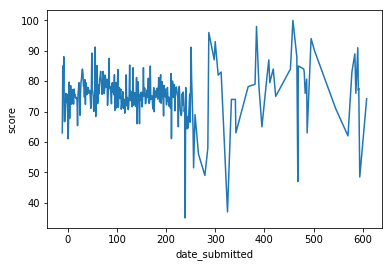

In [3]:
# This code shows that there is NO logical dependence between students score and submission date
studentAssessment = pd.read_csv('studentAssessment.csv')
studentAssessment1 = studentAssessment#[(studentAssessment['date_submitted'] <= 50) | ((studentAssessment['date_submitted'] >= 200) & (studentAssessment['date_submitted'] <=300)) ]

studentAssessment1['date_submitted'] = np.floor(studentAssessment1['date_submitted'])
studentAssessment1 = studentAssessment.groupby('date_submitted').agg({'score': ['mean', 'count']})
studentAssessment1.reset_index(level=[0], inplace=True)
studentAssessment1.columns = ["date_submitted", "score", "count"]

sns.lineplot(x = studentAssessment1['date_submitted'], y = studentAssessment1['score'])

In [4]:
# This function is returning count of rows and percentage allocation within a specific column, 
#and for each unique value of another column

# Function has 3 parameters: column of tab, row of the tab, and dataset.

def tabel(colname, rowname, data):
    tab = pd.crosstab(data[colname], data[rowname]) 
    tab.reset_index(level=0, inplace=True)
    
    tab['total'] = 0
    cols = [colname]
    for col in data[rowname].unique():
        tab['total'] = tab['total'] + tab[col]    
        cols.append(col)
    cols.append('total')
    #tab.columns = cols
    for col in data[rowname].unique():
        ratiocol = col + '_%'
        tab[ratiocol] = round(100 * tab[col] / tab['total'], 2)
    return tab

In [5]:
colname = 'age_band'
tabel(colname, 'final_result', studentInfo)

final_result,age_band,Distinction,Fail,Pass,Withdrawn,total,Pass_%,Withdrawn_%,Fail_%,Distinction_%
0,0-35,1863,5231,8469,7381,22944,36.91,32.17,22.80,8.12
1,35-55,1120,1792,3800,2721,9433,40.28,28.85,19.00,11.87
2,55<=,41,29,92,54,216,42.59,25.00,13.43,18.98


In [6]:
colname = 'region'
tabel(colname, 'final_result', studentInfo)

final_result,region,Distinction,Fail,Pass,Withdrawn,total,Pass_%,Withdrawn_%,Fail_%,Distinction_%
0,East Anglian Region,327,698,1309,1006,3340,39.19,30.12,20.90,9.79
1,East Midlands Region,200,462,881,822,2365,37.25,34.76,19.53,8.46
2,Ireland,98,261,552,273,1184,46.62,23.06,22.04,8.28
3,London Region,263,744,1099,1110,3216,34.17,34.51,23.13,8.18
4,North Region,230,327,691,575,1823,37.90,31.54,17.94,12.62
5,North Western Region,213,704,955,1034,2906,32.86,35.58,24.23,7.33
6,Scotland,328,852,1359,907,3446,39.44,26.32,24.72,9.52
7,South East Region,244,375,843,649,2111,39.93,30.74,17.76,11.56
8,South Region,333,544,1287,928,3092,41.62,30.01,17.59,10.77
9,South West Region,264,465,949,758,2436,38.96,31.12,19.09,10.84


In [7]:

colname = 'highest_education'
tabel(colname, 'final_result', studentInfo)

final_result,highest_education,Distinction,Fail,Pass,Withdrawn,total,Pass_%,Withdrawn_%,Fail_%,Distinction_%
0,A Level or Equivalent,1496,2707,5812,4030,14045,41.38,28.69,19.27,10.65
1,HE Qualification,697,790,1960,1283,4730,41.44,27.12,16.70,14.74
2,Lower Than A Level,727,3426,4385,4620,13158,33.33,35.11,26.04,5.53
3,No Formal quals,16,95,87,149,347,25.07,42.94,27.38,4.61
4,Post Graduate Qualification,88,34,117,74,313,37.38,23.64,10.86,28.12


In [8]:
colname = 'studied_credits'
credits = [30, 60, 90, 120, 150, 180, 210, 240, 270, 300]
tab = pd.crosstab(studentInfo[studentInfo[colname].isin(credits)][colname], studentInfo[studentInfo[colname].isin(credits)].final_result) 

tab.reset_index(level=0, inplace=True)
tab.columns = [colname, 'Distinction', 'Fail', 'Pass', 'Withdrawn']
tab['total'] = tab.Distinction + tab.Fail + tab.Pass + tab.Withdrawn
tab['Distinction_%'] = round(100 * tab['Distinction'] / tab['total'], 2)
tab['Fail_%'] = round(100 * tab['Fail'] / tab['total'], 2)
tab['Pass_%'] = round(100 * tab['Pass'] / tab['total'], 2)
tab['Withdrawn_%'] = round(100 * tab['Withdrawn'] / tab['total'], 2)
tab

,studied_credits,Distinction,Fail,Pass,Withdrawn,total,Distinction_%,Fail_%,Pass_%,Withdrawn_%
0,30,530,1011,1580,628,3749,14.14,26.97,42.14,16.75
1,60,1542,3677,6961,4571,16751,9.21,21.95,41.56,27.29
2,90,296,649,1054,1145,3144,9.41,20.64,33.52,36.42
3,120,515,1238,2026,2549,6328,8.14,19.56,32.02,40.28
4,150,38,151,236,344,769,4.94,19.64,30.69,44.73
5,180,32,160,200,438,830,3.86,19.28,24.10,52.77
6,210,6,25,37,101,169,3.55,14.79,21.89,59.76
7,240,8,26,36,150,220,3.64,11.82,16.36,68.18
8,270,2,9,9,25,45,4.44,20.00,20.00,55.56
9,300,1,7,5,16,29,3.45,24.14,17.24,55.17


In [9]:

colname = 'imd_band'
tabel(colname, 'final_result', studentInfo)

final_result,imd_band,Distinction,Fail,Pass,Withdrawn,total,Pass_%,Withdrawn_%,Fail_%,Distinction_%
0,0-10%,168,916,996,1231,3311,30.08,37.18,27.67,5.07
1,10-20,191,912,1167,1246,3516,33.19,35.44,25.94,5.43
2,20-30%,263,844,1226,1321,3654,33.55,36.15,23.10,7.20
3,30-40%,315,784,1345,1095,3539,38.01,30.94,22.15,8.90
4,40-50%,293,697,1224,1042,3256,37.59,32.00,21.41,9.00
5,50-60%,297,701,1227,899,3124,39.28,28.78,22.44,9.51
6,60-70%,299,538,1209,859,2905,41.62,29.57,18.52,10.29
7,70-80%,313,599,1170,797,2879,40.64,27.68,20.81,10.87
8,80-90%,328,495,1165,774,2762,42.18,28.02,17.92,11.88
9,90-100%,358,421,1101,656,2536,43.41,25.87,16.60,14.12


In [10]:

colname = 'gender'
tabel(colname, 'final_result', studentInfo)

final_result,gender,Distinction,Fail,Pass,Withdrawn,total,Pass_%,Withdrawn_%,Fail_%,Distinction_%
0,F,1394,3103,5735,4486,14718,38.97,30.48,21.08,9.47
1,M,1630,3949,6626,5670,17875,37.07,31.72,22.09,9.12


In [11]:
# this cell combines student ages table with vle table [vle_aged]
# and shows average number of clicks per module per presentation. (? might need improvements)


student_ages = studentInfo[['id_student', 'age_band']].drop_duplicates(keep=False)

vle_aged = pd.merge(studentVle, student_ages, how = 'left', left_on = 'id_student', right_on = 'id_student')
for course in courses.code_presentation.unique():
    vle_aged1 = vle_aged[(vle_aged['code_presentation'] == course)]
    tab = pd.crosstab(vle_aged1.age_band
                    , vle_aged1.code_module
                    , values =  vle_aged1.sum_click
                    , aggfunc = 'mean')
    print(course, tab)

2013J code_module       AAA       BBB       DDD       EEE       FFF       GGG
age_band                                                               
0-35         3.275939  2.779916  2.508461  4.283015  4.373975  3.341095
35-55        3.590380  3.363006  2.748153  4.649339  4.494394  3.699856
55<=         4.212668  2.438503  2.581309       NaN  5.069753  4.531915
2014J code_module       AAA       BBB       CCC       DDD       EEE       FFF  \
age_band                                                                  
0-35         3.127152  3.677504  3.965428  2.388454  3.991766  4.319730   
35-55        3.774276  3.976955  4.137580  2.820180  4.181331  4.491808   
55<=         4.110271  4.154858  4.170355  2.818639  4.096700  4.512621   

code_module       GGG  
age_band               
0-35         3.223813  
35-55        3.567193  
55<=         3.534562  
2013B code_module       BBB       DDD       FFF
age_band                                 
0-35         3.244166  2.567158  4.453088


In [12]:
# students info table merged with number of clicks on average.

clicks = studentVle.groupby(['id_student', 'code_module', 'code_presentation']).agg({'sum_click':'mean'})
clicks.reset_index(level=[0, 1, 2], inplace=True)
clicks

results_aged = pd.merge(studentInfo, 
                        clicks, 
                        how = 'left', 
                        left_on = ['id_student', 'code_module', 'code_presentation'], 
                        right_on = ['id_student', 'code_module', 'code_presentation'])


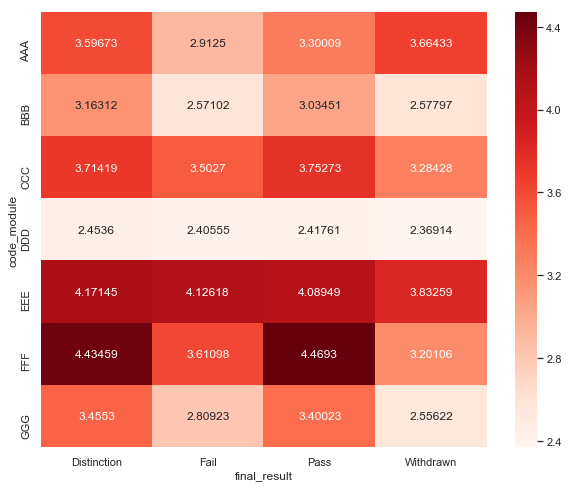

In [13]:
# This cell shows average clicks on each final esult for each courses. code presentation is not distincted.

tab = pd.crosstab(results_aged.code_module
                    , results_aged.final_result
                    , values =  results_aged.sum_click
                    , aggfunc = 'mean')

sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(tab, annot=True, cmap='Reds', fmt='g')

#average of average. is it correct?
# we can check the course that has high VLE on fails?
# check this heatmap by ages band?

In [14]:
# Defining the function for listing average clicks on Passed, Failed, Distincted or withdrawed courses.
# Function has 4 parameters. First two params - height and width of the main area of subplot will be allocated 
# with these filtering columns (in the next examples they are 'code_module' and 'code_presentation')
# third param is column that will be allocated on y axis (x axis will be constantly the final_result)
# fourth param is dataset.


def variable_results(filter_col=None, filter_col2='', param=None, data=None):
    i = 1
    nrow = results_aged[filter_col].unique().size
    ncol = results_aged[filter_col2].unique().size
    figure = plt.figure(figsize=(18,36))
    for val1 in results_aged[filter_col].unique():
        for val2 in results_aged[filter_col2].unique():
            ax = figure.add_subplot(nrow, ncol, i)
            ax.set_title(val2 + ' / ' + val1)
            df = []
            df = data[data[filter_col] == val1]
            if filter_col2 != '':
                df = df[df[filter_col2] == val2]
            tab = pd.crosstab(df[param]
                                , results_aged.final_result
                                , values =  results_aged.sum_click
                                , aggfunc = 'mean')
            if tab.empty == False:
                tab['Distinction'] = round(tab['Distinction'], 2) 
                tab['Pass'] = round(tab['Pass'], 2)
                tab['Fail'] = round(tab['Fail'], 2)
                tab['Withdrawn'] = round(tab['Withdrawn'], 2)
                sns.heatmap(tab, annot=True, fmt='g', cmap = 'RdYlGn')
            i = i + 1


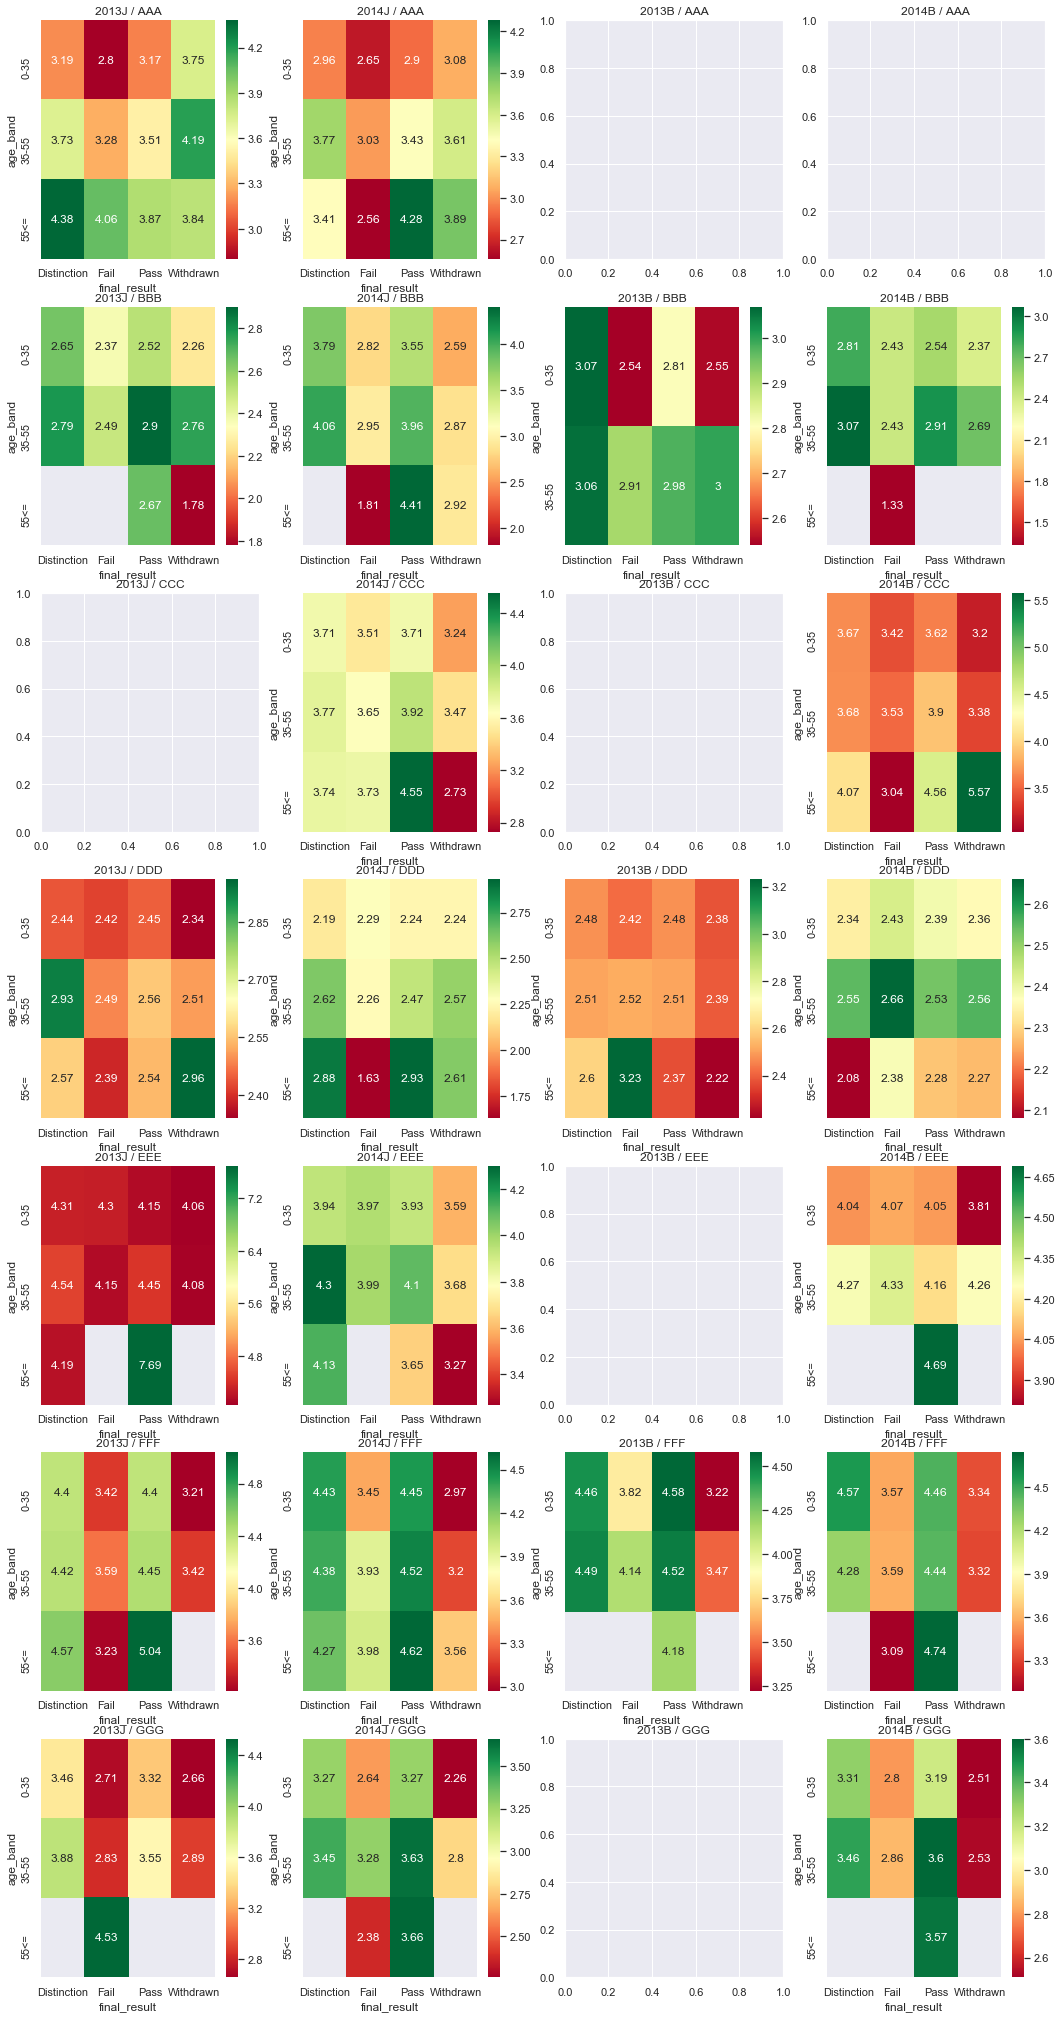

In [15]:

variable_results('code_module', 'code_presentation', 'age_band', results_aged)

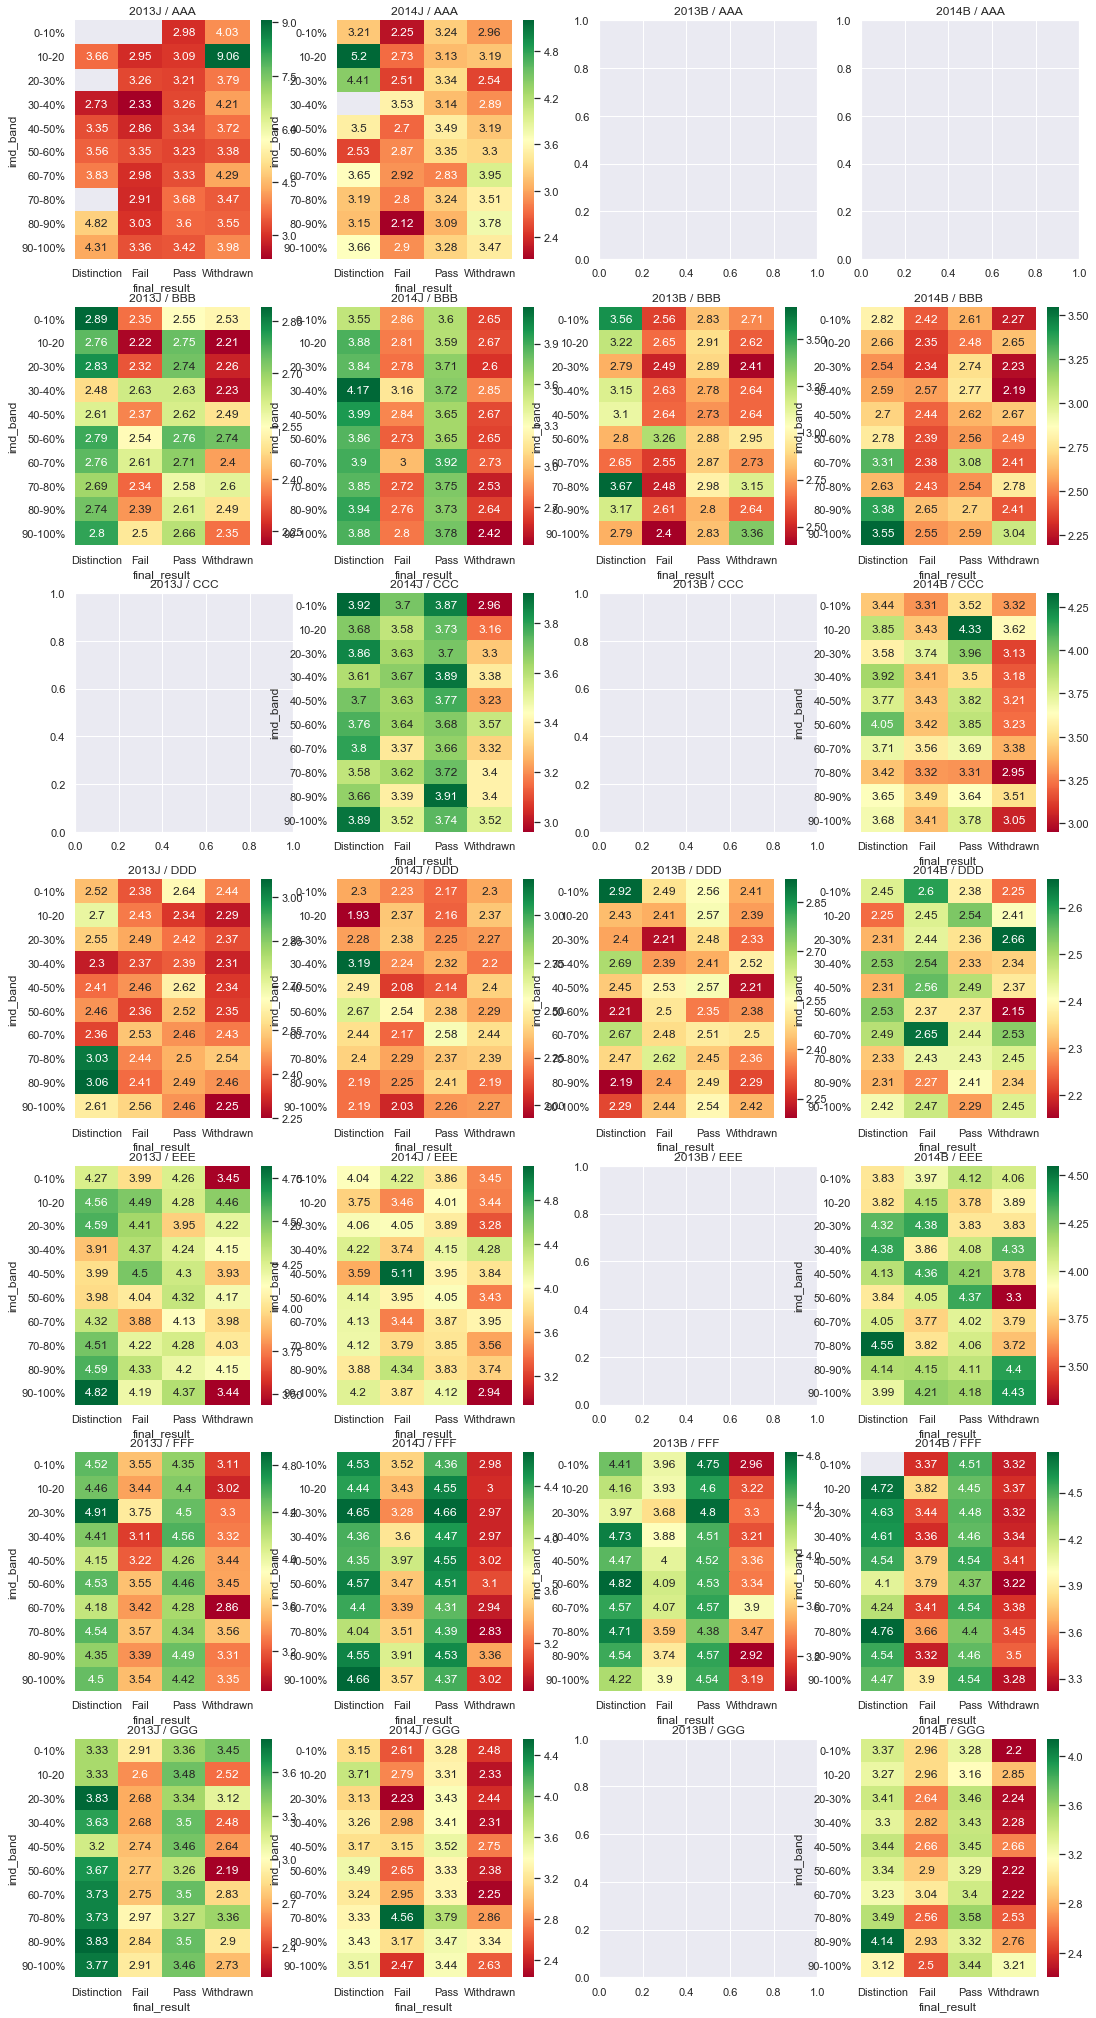

In [16]:
variable_results('code_module', 'code_presentation', 'imd_band', results_aged)

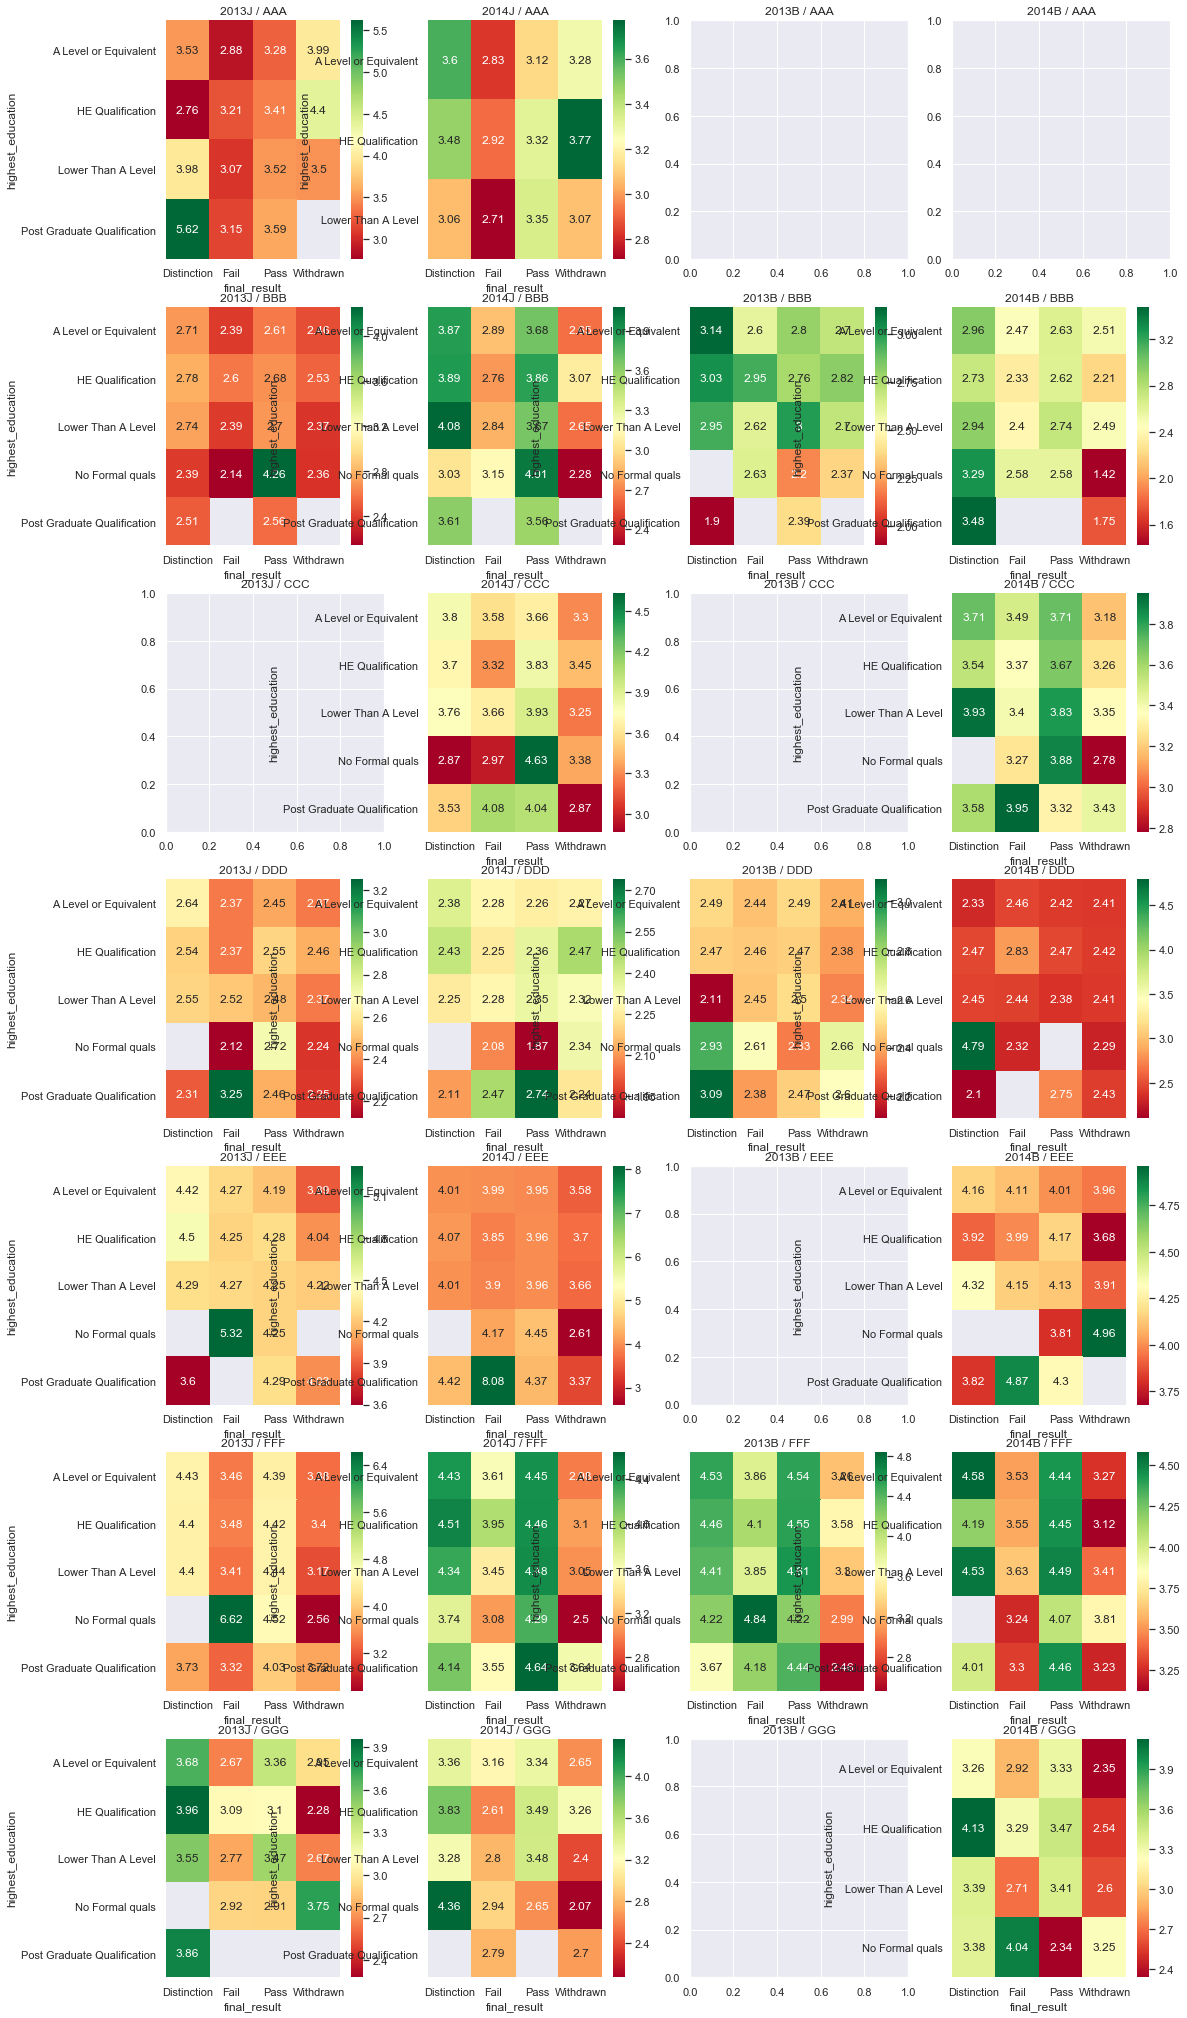

In [17]:
variable_results('code_module', 'code_presentation', 'highest_education', results_aged)

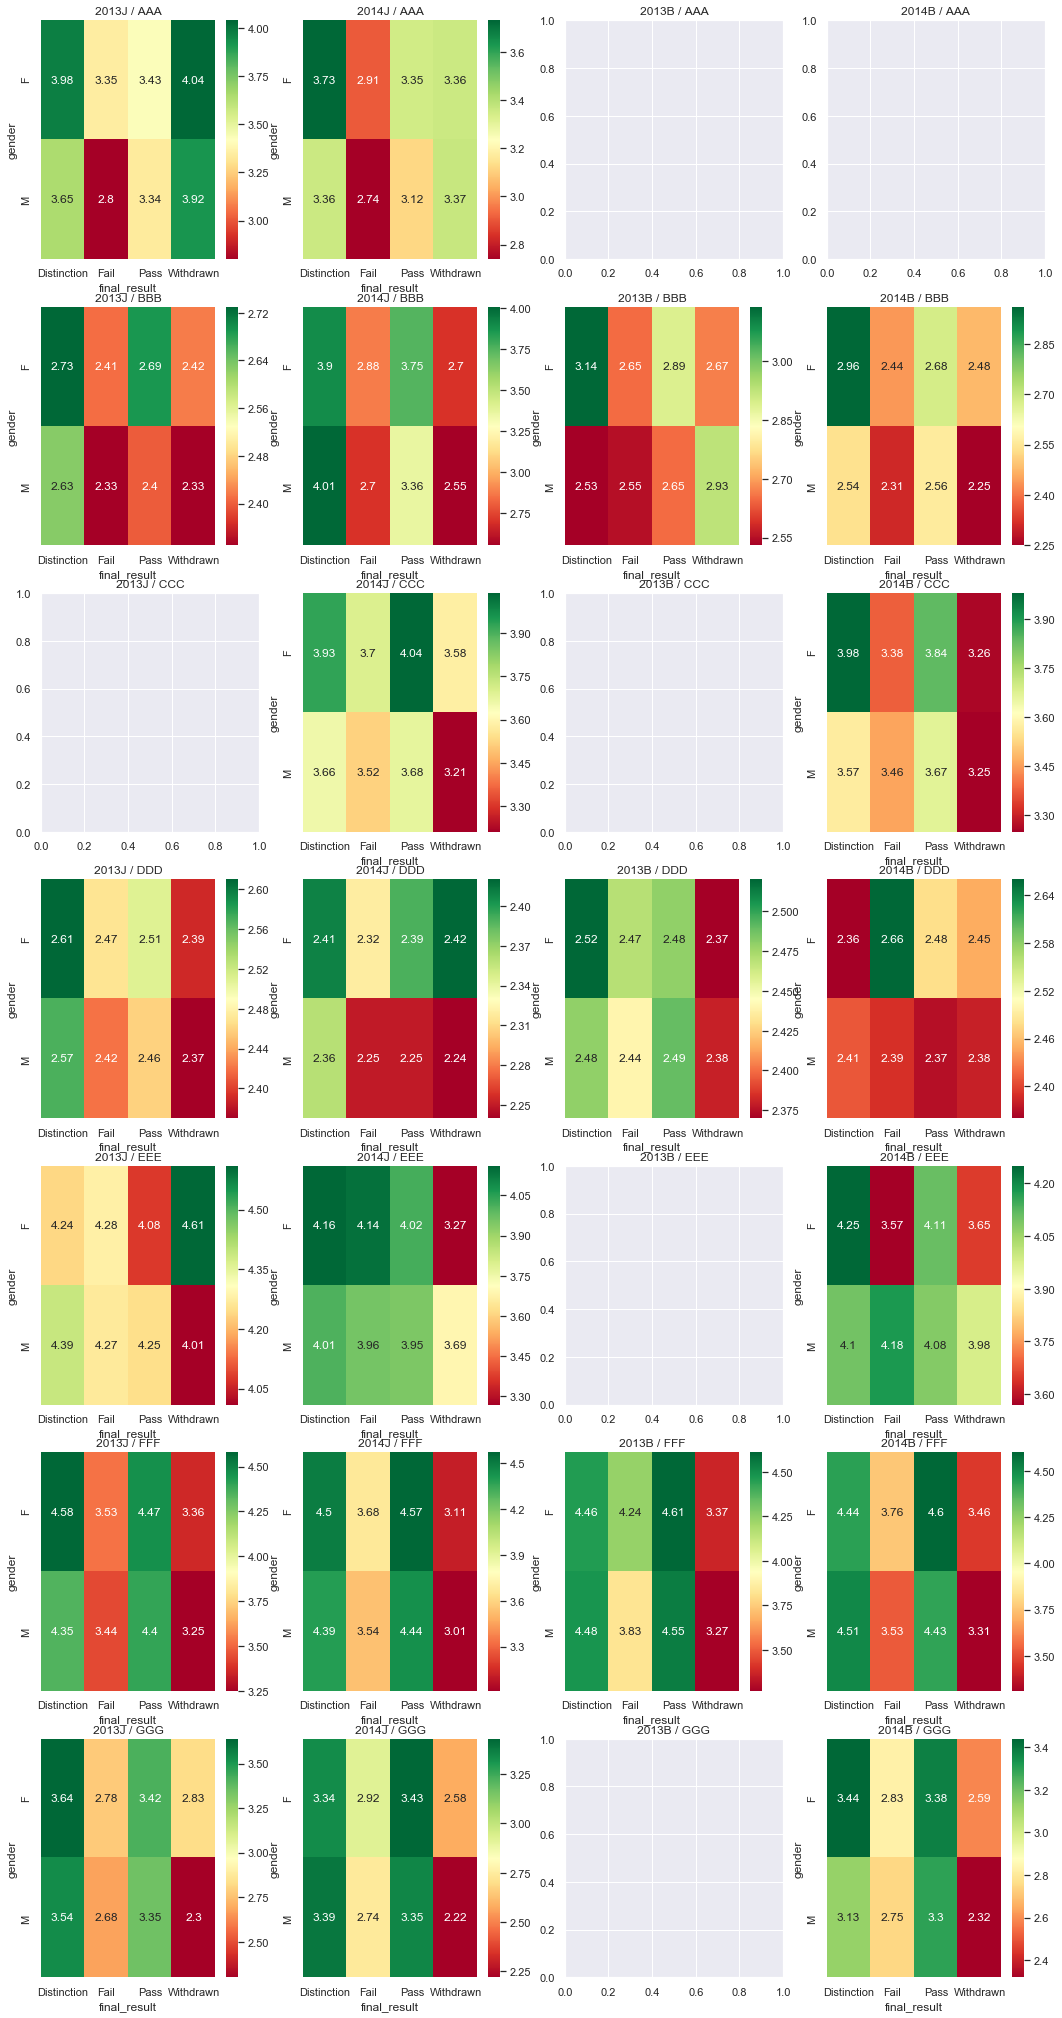

In [18]:
variable_results('code_module', 'code_presentation', 'gender', results_aged)

In [19]:

#print(studentVle.head(3))

vle.groupby(['code_presentation', 'code_module','activity_type']).size()

#Activity types with number of websites
print(vle.groupby(['activity_type']).size())


activity_type
dataplus            28
dualpane            20
externalquiz        26
folder               2
forumng            194
glossary            21
homepage            22
htmlactivity         4
oucollaborate       82
oucontent          996
ouelluminate        21
ouwiki              49
page               102
questionnaire       61
quiz               127
repeatactivity       5
resource          2660
sharedsubpage        3
subpage           1055
url                886
dtype: int64


      id_site activity_type  mean_clicks  sum_clicks
5996   913490     oucontent    21.585799       83904
18     526754     oucontent    15.721628       69128
2547   716327     oucontent    14.591535      102739
5369   882682          quiz    14.109977      134073
6100   913671      resource    13.728000        3432
6      526741     oucontent    13.483830       74215


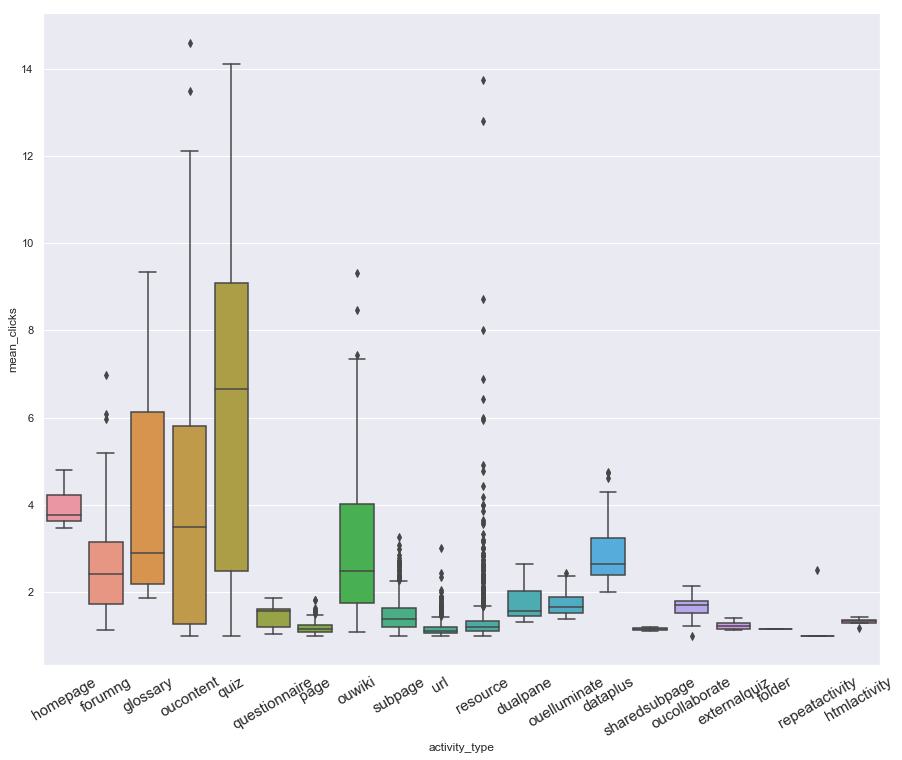

In [206]:

# merge tables - add vle detailed information onto studentVle.

vle_details = pd.merge(studentVle, 
                        vle, 
                        how = 'left', 
                        left_on = ['code_module', 'code_presentation', 'id_site'], 
                        right_on = ['code_module', 'code_presentation', 'id_site'])


# Group activities for each site. aggregate mean and sum of the clicks.
vle_activity_totals  = vle_details.groupby(['id_site', 'activity_type']).agg({'sum_click': ['mean', 'sum']})
vle_activity_totals.reset_index(level= [0,1], inplace=True)
vle_activity_totals.columns = ['id_site', 'activity_type', 'mean_clicks', 'sum_clicks'] 

# Sites with top average activities
print(vle_activity_totals.sort_values('mean_clicks', ascending = False).head(6))


#Mean number of clicks on sites. each point represents site_id and mean activities on that.
# Boxplot shows popularity (in terms of clicks) of these sites, groupped by categories.
sns.set(rc={'figure.figsize':(15,12)})
g = sns.boxplot(x = vle_activity_totals[vle_activity_totals['mean_clicks'] <= 15].activity_type,
                y = vle_activity_totals[vle_activity_totals['mean_clicks'] <= 15].mean_clicks)
g.set_xticklabels(g.get_xticklabels(), rotation=30, size = 15)

fig = g.get_figure()
fig.savefig('interactions.png', bbox_inches='tight')

      id_site activity_type  mean_clicks  sum_clicks
3338   909096          quiz    81.696970        2696
2214   779395     oucontent    25.333333          76
2878   877046     oucontent    23.000000          23
56     526854     oucontent    20.000000         160
2217   779401     oucontent    19.000000          38
948    661801      resource    14.000000          14


[Text(0,0,'homepage'),
 Text(0,0,'forumng'),
 Text(0,0,'glossary'),
 Text(0,0,'oucontent'),
 Text(0,0,'quiz'),
 Text(0,0,'questionnaire'),
 Text(0,0,'page'),
 Text(0,0,'ouwiki'),
 Text(0,0,'subpage'),
 Text(0,0,'url'),
 Text(0,0,'resource'),
 Text(0,0,'dualpane'),
 Text(0,0,'ouelluminate'),
 Text(0,0,'sharedsubpage'),
 Text(0,0,'dataplus'),
 Text(0,0,'oucollaborate'),
 Text(0,0,'externalquiz'),
 Text(0,0,'htmlactivity')]

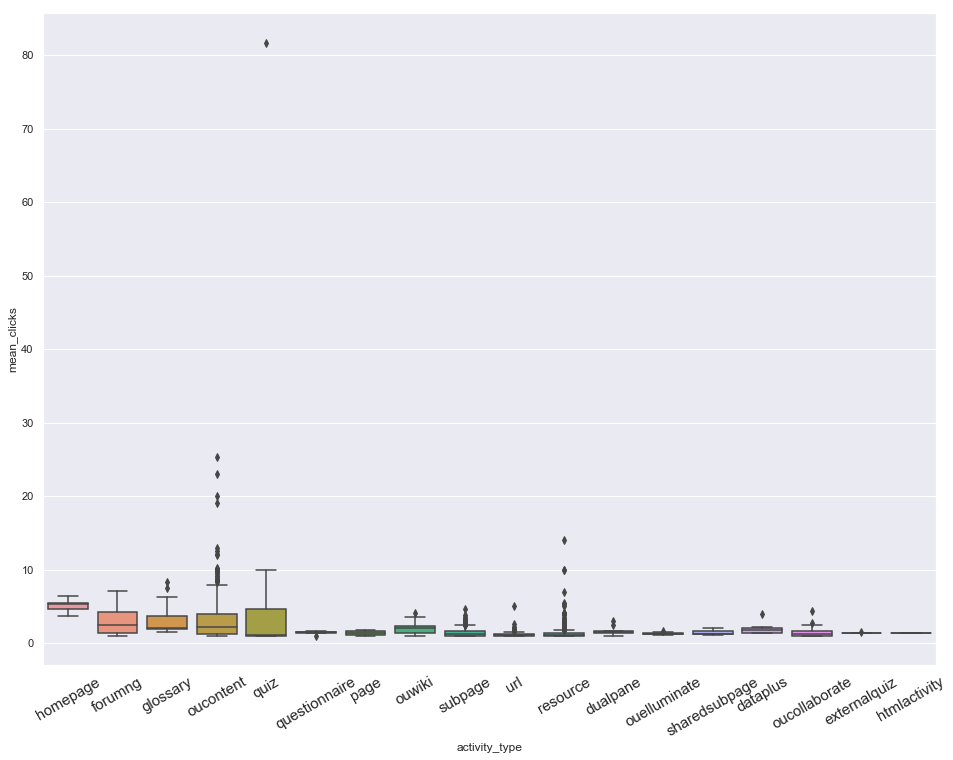

In [21]:
# All the same logic, but with the interactions ONLY BEFORE the course started.

vle_details = pd.merge(studentVle[studentVle['date'] < 0], 
                        vle, 
                        how = 'left', 
                        left_on = ['code_module', 'code_presentation', 'id_site'], 
                        right_on = ['code_module', 'code_presentation', 'id_site'])


# Group activities for each site. aggregate mean and sum of the clicks.
vle_activity_totals  = vle_details.groupby(['id_site', 'activity_type']).agg({'sum_click': ['mean', 'sum']})
vle_activity_totals.reset_index(level= [0,1], inplace=True)
vle_activity_totals.columns = ['id_site', 'activity_type', 'mean_clicks', 'sum_clicks'] 



# There is an outlier that needs to be filtered outfor better plot in the next cell.
print(vle_activity_totals.sort_values('mean_clicks', ascending = False).head(6))


sns.set(rc={'figure.figsize':(16,12)})
g = sns.boxplot(x = vle_activity_totals.activity_type, y = vle_activity_totals.mean_clicks)
g.set_xticklabels(g.get_xticklabels(), rotation=30, size = 15)


[Text(0,0,'homepage'),
 Text(0,0,'forumng'),
 Text(0,0,'glossary'),
 Text(0,0,'oucontent'),
 Text(0,0,'quiz'),
 Text(0,0,'questionnaire'),
 Text(0,0,'page'),
 Text(0,0,'ouwiki'),
 Text(0,0,'subpage'),
 Text(0,0,'url'),
 Text(0,0,'resource'),
 Text(0,0,'dualpane'),
 Text(0,0,'ouelluminate'),
 Text(0,0,'sharedsubpage'),
 Text(0,0,'dataplus'),
 Text(0,0,'oucollaborate'),
 Text(0,0,'externalquiz'),
 Text(0,0,'htmlactivity')]

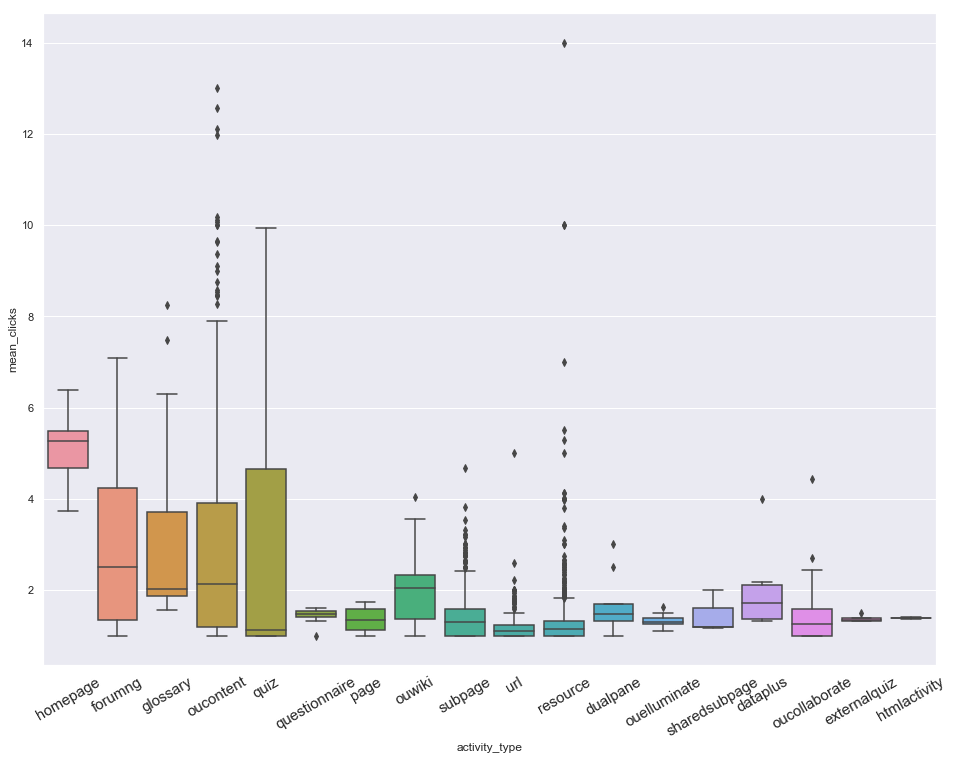

In [22]:
# lets remove OUTLIER to see better graph for overal image
vle_activity_totals = vle_activity_totals[vle_activity_totals['mean_clicks'] < 15]


sns.set(rc={'figure.figsize':(16,12)})
g = sns.boxplot(x = vle_activity_totals.activity_type, y = vle_activity_totals.mean_clicks)
g.set_xticklabels(g.get_xticklabels(), rotation=30, size = 15)


In [23]:
# - check influence of num_of_prev_attempts.studentInfo on final_result.studentInfo

colname = 'num_of_prev_attempts'
attempts_dt = tabel(colname, 'final_result', studentInfo)

attempts_dt

final_result,num_of_prev_attempts,Distinction,Fail,Pass,Withdrawn,total,Pass_%,Withdrawn_%,Fail_%,Distinction_%
0,0,2857,5731,11148,8685,28421,39.22,30.56,20.16,10.05
1,1,143,1009,997,1150,3299,30.22,34.86,30.59,4.33
2,2,22,236,170,247,675,25.19,36.59,34.96,3.26
3,3,1,57,31,53,142,21.83,37.32,40.14,0.70
4,4,0,12,13,14,39,33.33,35.90,30.77,0.00
5,5,0,6,2,5,13,15.38,38.46,46.15,0.00
6,6,1,1,0,2,4,0.00,50.00,25.00,25.00


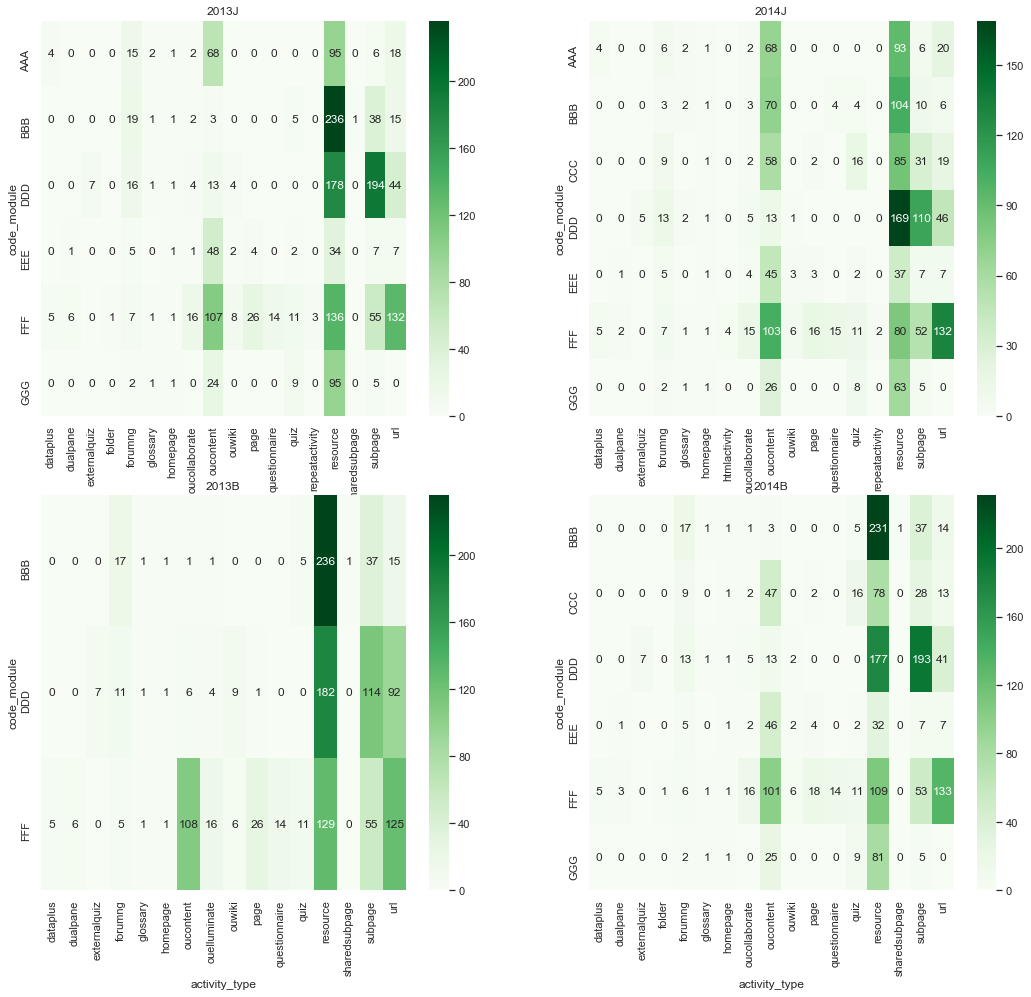

In [77]:
# - visualise activity_type.vle for different modules, 

figure = plt.figure(figsize=(18,16))
i = 1
for semester in vle['code_presentation'].unique():
    ax = figure.add_subplot(2, 2, i)
    ax.set_title(semester)
    df = []
    df = vle[vle['code_presentation'] == semester]
    
    tab = pd.crosstab(df.code_module, df.activity_type)
    sns.heatmap(tab, annot=True, fmt='g', cmap = 'Greens')
    i = i + 1
#plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0.5)

In [207]:
# check average score.studentAssessment for each module to suggest which activities were most efficient

        
weights = assessments.groupby(['code_module', 'code_presentation']).agg({'weight':'sum'})
weights.reset_index(level=[0, 1], inplace=True)
weights.columns = ['code_module', 'code_presentation', 'sum_weight']
weights


assessments_totalled = pd.merge(studentAssessment, 
                        assessments, 
                        how = 'left', 
                        left_on = ['id_assessment'], 
                        right_on = ['id_assessment'])

assessments_totalled2 = pd.merge(assessments_totalled, 
                        weights, 
                        how = 'left', 
                        left_on = ['code_module', 'code_presentation'], 
                        right_on = ['code_module', 'code_presentation'])

assessments_totalled2['weight_ratio'] = assessments_totalled2['weight'] / assessments_totalled2['sum_weight']
assessments_totalled2['assessment_score'] = assessments_totalled2['score'] * assessments_totalled2['weight_ratio']
assessments_totalled2.head(6)

student_scores = assessments_totalled2.groupby(['code_presentation', 'code_module', 'id_student']).agg({'assessment_score':'sum'})
student_scores.reset_index(level=[0, 1, 2], inplace=True)
student_scores

#module_scores = student_scores[student_scores['assessment_score' > 0]].groupby(['code_presentation', 'code_module']).agg({'assessment_score': 'mean'})
#module_scores.reset_index(level=[0, 1], inplace=True)
#module_scores




,code_presentation,code_module,id_student,assessment_score
0,2013B,BBB,23629,8.345
1,2013B,BBB,25107,30.255
2,2013B,BBB,27891,13.905
3,2013B,BBB,29144,26.510
4,2013B,BBB,31663,31.960
5,2013B,BBB,33666,8.970
6,2013B,BBB,34229,32.535
7,2013B,BBB,34353,32.865
8,2013B,BBB,34431,0.400
9,2013B,BBB,34756,6.765


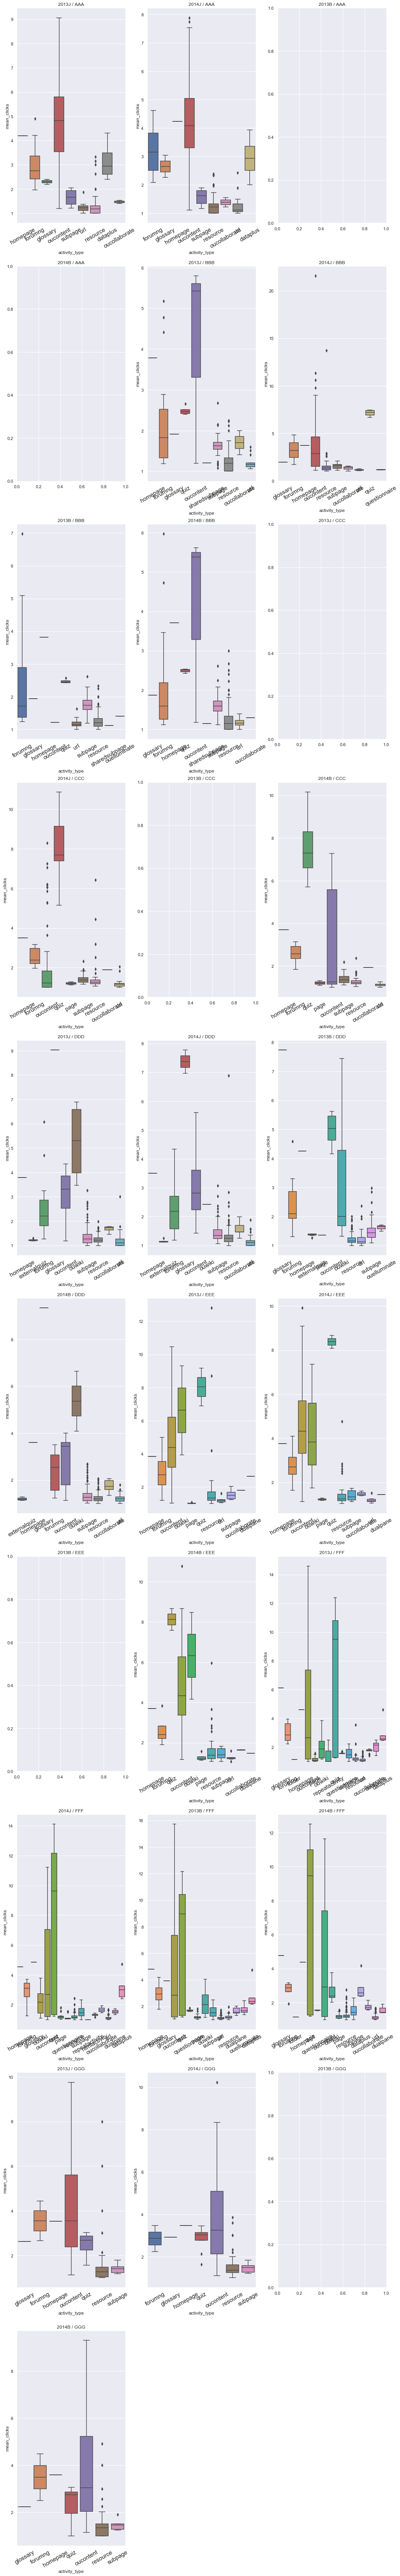

In [163]:
# merge tables - add vle detailed information onto studentVle.

figure = plt.figure(figsize=(17,120))
i = 1

for module in studentVle['code_module'].unique():
    for semester in studentVle['code_presentation'].unique():
        df = studentVle[(studentVle['code_presentation'] == semester) & (studentVle['code_module'] == module)]
        ax = figure.add_subplot(10, 3, i)
        ax.set_title(semester + ' / ' + module)
        if df.shape[0] > 0:   
        
            vle_details = pd.merge(df, 
                                    vle, 
                                    how = 'left', 
                                    left_on = ['code_module', 'code_presentation', 'id_site'], 
                                    right_on = ['code_module', 'code_presentation', 'id_site'])

            vle_activity_totals  = vle_details.groupby(['id_site', 'activity_type']).agg({'sum_click': ['mean', 'sum']})
            vle_activity_totals.reset_index(level= [0,1], inplace=True)
            vle_activity_totals.columns = ['id_site', 'activity_type', 'mean_clicks', 'sum_clicks'] 

            g = sns.boxplot(x = vle_activity_totals.activity_type, y = vle_activity_totals.mean_clicks)
            g.set_xticklabels(g.get_xticklabels(), rotation=30, size = 15)
        i = i + 1
    
    

#Mean number of clicks on sites. each point represents site_id and mean activities on that.
# Boxplot shows popularity (in terms of clicks) of these sites, groupped by categories.


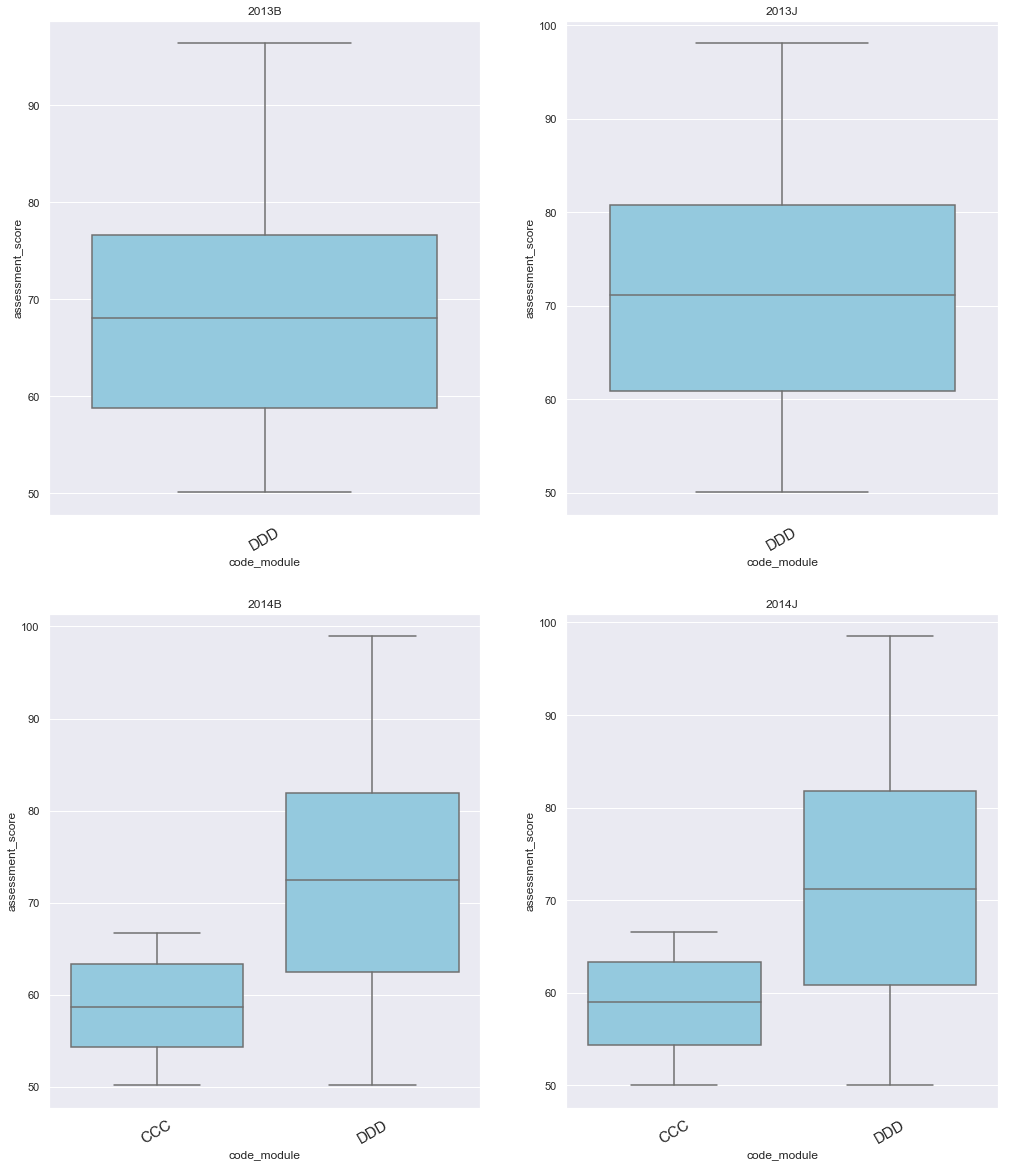

In [175]:
student_scores2 = student_scores[student_scores['assessment_score'] > 50]

figure = plt.figure(figsize=(17,20))
i = 1

for semester in student_scores2['code_presentation'].unique():
    ax = figure.add_subplot(2, 2, i)
    ax.set_title(semester)
    
    dt = student_scores2[student_scores2['code_presentation'] == semester]
    g = sns.boxplot(x = dt['code_module'], y = dt['assessment_score'], color = "skyblue")
    g.set_xticklabels(g.get_xticklabels(), rotation=30, size = 15)
    i = i + 1

    
    
    

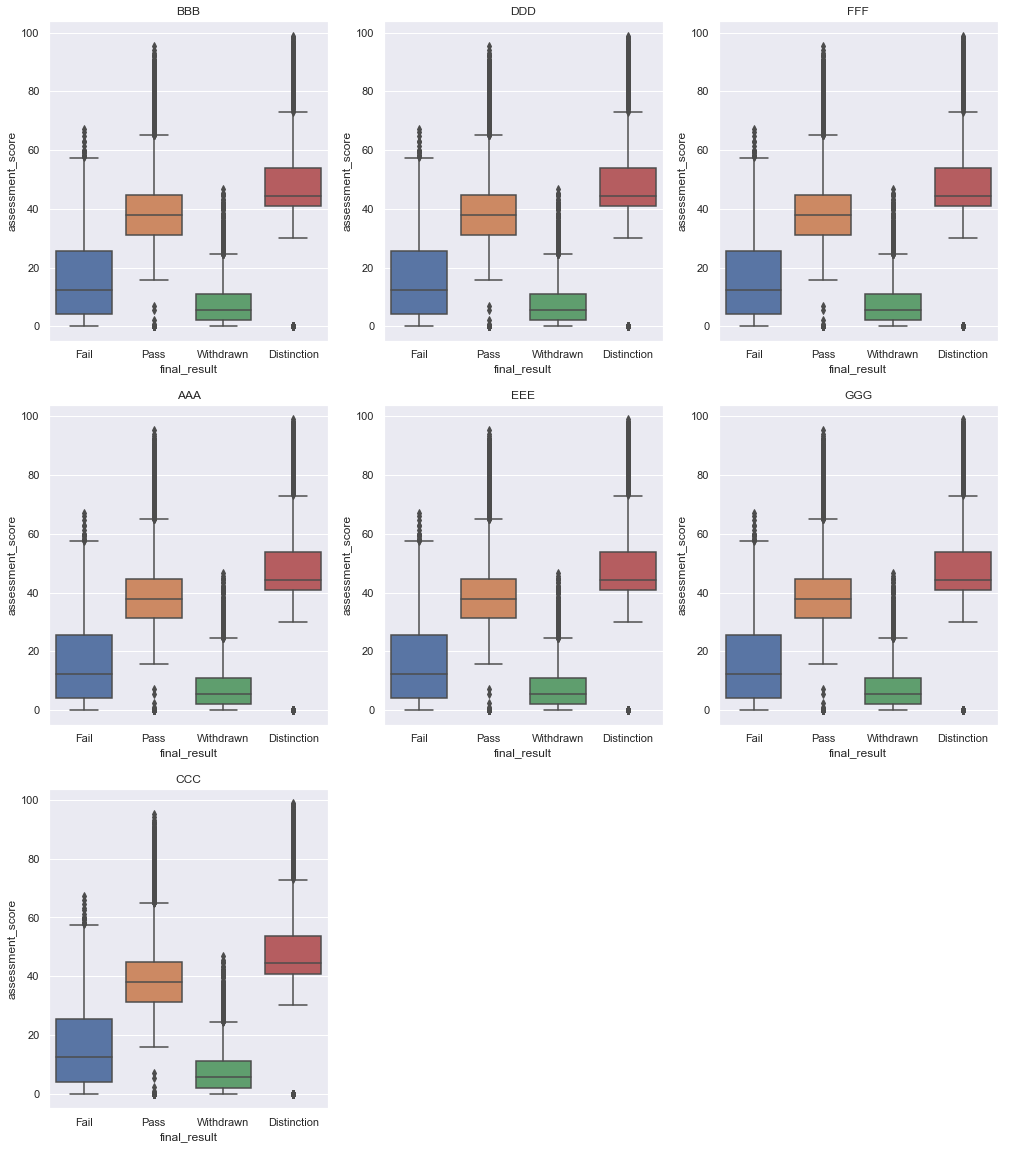

In [191]:
student_scores

studentInfo

student_result_scores = pd.merge(student_scores, 
                        studentInfo, 
                        how = 'left', 
                        left_on = ['code_module', 'code_presentation', 'id_student'], 
                        right_on = ['code_module', 'code_presentation', 'id_student'])

student_result_scores = student_result_scores[[ 'code_presentation', 'code_module', 'id_student', 'assessment_score', 'final_result']]
student_result_scores


figure = plt.figure(figsize=(17,20))
i = 1

for module in student_result_scores['code_module'].unique():
    ax = figure.add_subplot(3, 3, i)
    ax.set_title(module)
    
    dt = student_result_scores[student_result_scores['code_module'] == module]
    
    sns.boxplot(x = student_result_scores.final_result, y = student_result_scores.assessment_score)
    #g.set_xticklabels(g.get_xticklabels(), rotation=30, size = 15)
    i = i + 1


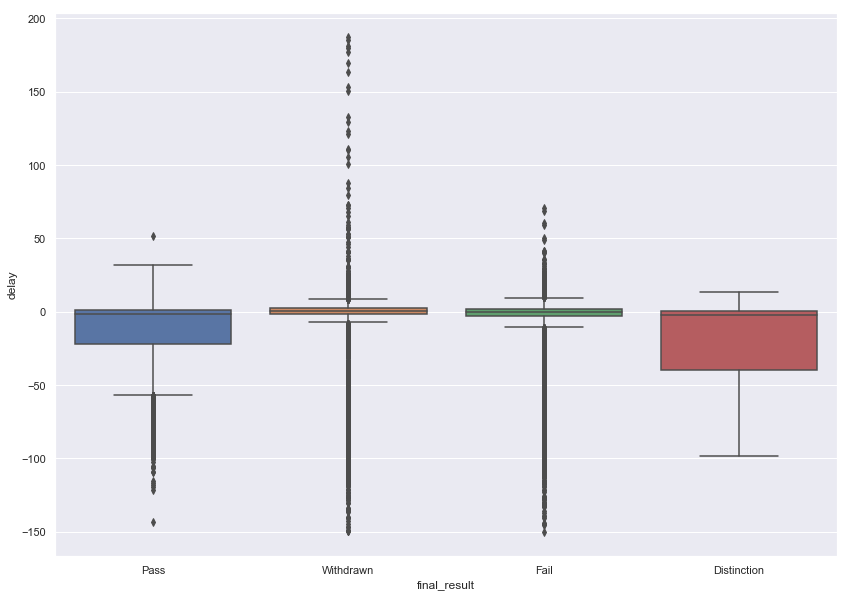

In [208]:
assessments_totalled = pd.merge(studentAssessment, 
                        assessments, 
                        how = 'left', 
                        left_on = ['id_assessment'], 
                        right_on = ['id_assessment'])
assessments_totalled['delay'] = assessments_totalled['date_submitted'] - assessments_totalled['date']
assessments_totalled



student_delays = assessments_totalled.groupby(['code_presentation', 'code_module', 'id_student']).agg({'delay':'mean'})
student_delays.reset_index(level=[0, 1, 2], inplace=True)
student_delays

results_aged2 = pd.merge(results_aged, 
                        student_delays, 
                        how = 'left', 
                        left_on = ['id_student', 'code_module', 'code_presentation'], 
                        right_on = ['id_student', 'code_module', 'code_presentation'])

sns.set(rc={'figure.figsize':(14,10)})
g = sns.boxplot(x = results_aged2[ (results_aged2['delay'] > -150)].final_result
                , y = results_aged2[ (results_aged2['delay'] > -150)].delay)


fig = g.get_figure()
fig.savefig('delays.png', bbox_inches='tight')
